<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. Fatemi Zadeh</h4>
<h4 align="center">Sharif University of Technology, Fall 2024</h4>
<h4 align="center">Computer Assignment 5</h4>

<h4 align="center">

Questions: [Borna Khodabandeh](https://t.me/BornaKhodabandeh)

</h4>

**<font color='red'>Plagiarism is strongly prohibited!</font>**
You are allowed to use any library, except for any ready-made implementation of the spectral clustering algorithm.


**Student Name**: Taha Alimohammadi

**Student ID**: 401110459


# Spectral Clustering

Spectral clustering represents a paradigm shift in unsupervised learning, transforming the clustering problem from traditional feature space to a graph-theoretic perspective. Unlike classical methods like K-means, spectral clustering leverages the intrinsic geometric structure of data by:

1. Constructing a similarity graph, either from underlying connection between data points or a similarity measure
2. Analyzing the graph through linear algebra, using spectral graph theory
3. Embedding data in a low-dimensional space (spectral domain) that reveals natural clustering

![spectral-clustering](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*14q4A8NMsDP4C05caI1lZg.png)

In this problem you will get familiar with spectral clustering through implementation, and analysis.

### Recommended Reading
1. Luxburg, U. (2007). A Tutorial on Spectral Clustering
2. Von Luxburg, M. (2010). Clustering Stability
3. Ng, A., Jordan, M., & Weiss, Y. (2002). On Spectral Clustering

## Task 1: Social networks

A **social network** is a graph $ G = (V, E) $, where $ V $ is the set of nodes (representing individuals or entities), and $ E \subseteq V \times V $ is the set of edges representing relationships between them. Edges are typically formed based on some underlying social structure or interaction rules. A simple example could be Twitter, Instagram, Facebook. and a graph corresponding to the relationship between users.

A special case of the **Stochastic Block Model (SBM)** assumes $ K $ groups (or clusters) of nodes, where connections follow these rules:  
- Nodes within the same group (friends) are connected with a probability $ p $.  
- Nodes from different groups are connected with a lower probability $ q $, where $ q < p $.

Mathematically, let $ z(v) \in \{1, \dots, K\} $ denote the group of node $ v $. Then, the probability of an edge $ (u, v) \in E $ is:

$$
\mathbb{P}((u, v) \in E) = 
\begin{cases} 
p & \text{if } z(u) = z(v), \\
q & \text{if } z(u) \neq z(v).
\end{cases}
$$

This version of the SBM captures community structure, as nodes within the same group are more likely to connect than nodes in different groups.

<!-- ![citation-net](https://appliednetsci.springeropen.com/articles/10.1007/s41109-019-0232-2) -->

### Part 1.1: Stochastic Block Model Implementation

Your task is to implement a function `generate_SBM_network` that takes in the group sizes, edge probabilities `p` and `q`, and returns the adjacency matrix and true labels for the generated SBM network.

your labels should be numerical, with $z(v)\in\{1,\dots,K\}$ for K classes.

In [3]:
# DO NOT EDIT THIS BLOCK
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import networkx as nx

def plot_adjacency_matrix(adjacency_matrix, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 8))
    ax.spy(adjacency_matrix, markersize=2)
    ax.set_title('Network Connectivity')
    
def plot_graph(adjacency_matrix, labels=None, ax=None):
    # Create a new figure if no Axes is provided
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 8))
        standalone = True
    else:
        standalone = False

    # Create graph from adjacency matrix
    G = nx.from_numpy_array(adjacency_matrix)
    if labels is not None:
        if isinstance(labels, np.ndarray) and labels.ndim == 1:
            norm = plt.Normalize(vmin=labels.min(), vmax=labels.max())
            colors = plt.cm.viridis(norm(labels))
        else:
            norm = plt.Normalize(vmin=min(labels), vmax=max(labels))
            colors = plt.cm.viridis((np.array(labels) - min(labels)) / (max(labels) - min(labels)))
    else:
        colors = None
        norm = None

    pos = nx.spring_layout(G, seed=42)
    nx.draw(
        G, pos, node_color=colors, with_labels=False,
        node_size=50, edge_color="gray", alpha=0.7, ax=ax
    )
    ax.set_title('Graph Representation')

    if standalone:
        plt.show()

In [60]:

import numpy as np

def generate_SBM_network(group_sizes, p, q):

    n = sum(group_sizes)  
    true_labels = [] 
    for group_id, size in enumerate(group_sizes):
        true_labels.extend([group_id] * size)
    true_labels = np.array(true_labels)

    
    adjacency_matrix = np.zeros((n, n), dtype=int)

    
    start = 0
    for i, size_i in enumerate(group_sizes):
        end = start + size_i
        for j, size_j in enumerate(group_sizes):
            if i == j:
                
                block = np.random.rand(size_i, size_j) < p
            else:
                
                block = np.random.rand(size_i, size_j) < q
            adjacency_matrix[start:end, sum(group_sizes[:j]):sum(group_sizes[:j+1])] = block
        start = end

    
    np.fill_diagonal(adjacency_matrix, 0)

    return adjacency_matrix, true_labels


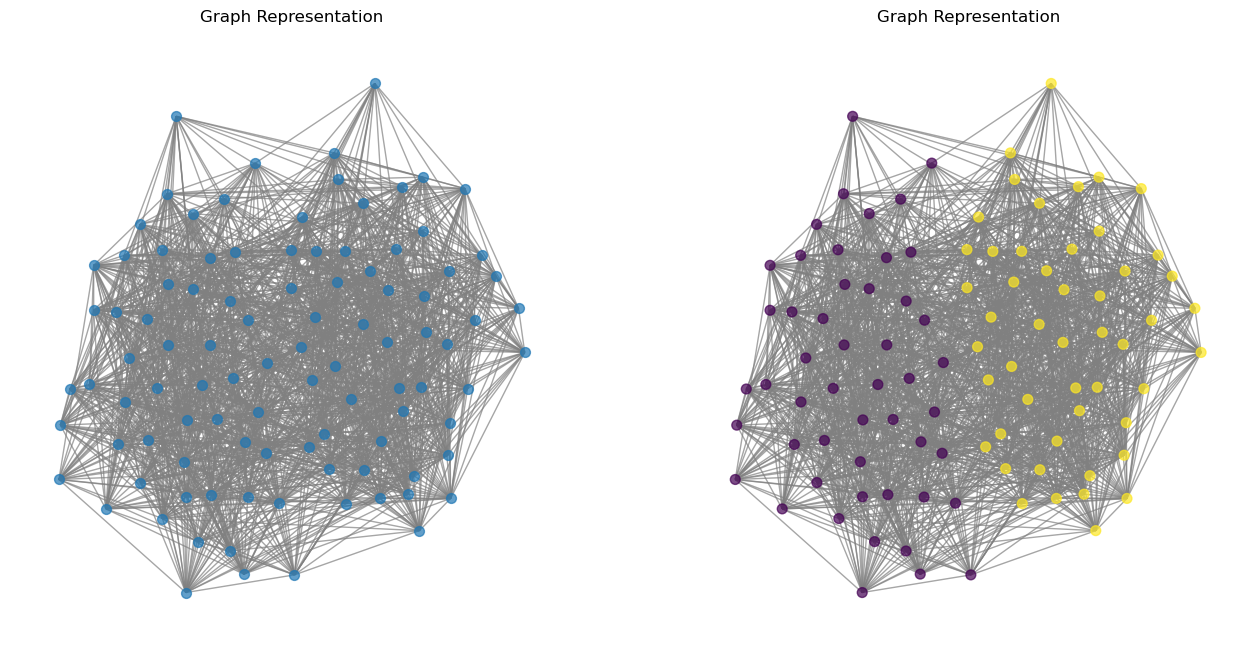

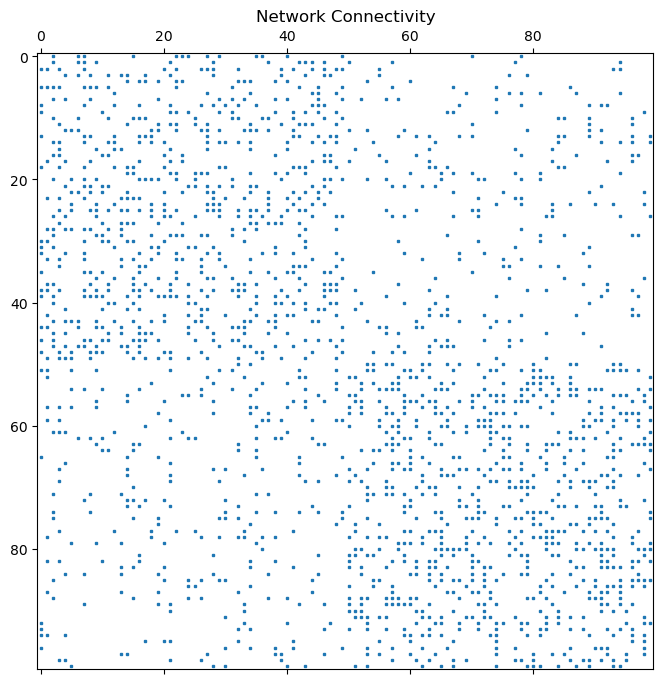

In [53]:
adjacency_matrix, true_labels = generate_SBM_network(
    group_sizes=[50, 50],
    p=0.3,
    q=0.1
)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
plot_graph(adjacency_matrix, ax=axes[0])
plot_graph(adjacency_matrix, labels=true_labels, ax=axes[1])
plt.show()
plot_adjacency_matrix(adjacency_matrix)

1. How do $p$ and $q$ affect network structure?

> Explain your answer: ### Effect of \( p \) and \( q \) on Network Structure:

1. **Within-group connections (\( p \)):**
   - Higher \( p \): Groups become denser and more cohesive.
   - Lower \( p \): Groups are sparser and less connected.

2. **Between-group connections (\( q \)):**
   - Higher \( q \): Groups are less distinct with more cross-group connections.
   - Lower \( q \): Groups become more isolated and distinct.

3. **Difference between \( p \) and \( q \):**
   - Larger \( p - q \): Stronger community structure.
   - Smaller \( p - q \): Weaker or indistinguishable community structure.
   - \( p = q \): No community structure (random graph).

4. **Key Scenarios:**
   - **High \( p \), low \( q \):** Clear and distinct communities.
   - **Similar \( p \) and \( q \):** Blurred or no community structure.
   - **Low \( p \) and \( q \):** Sparse network with weak connections.

In short, \( p \) controls internal group density, \( q \) controls cross-group connectivity, and the contrast between them determines the clarity of community structure.

## Task 2: Graph Laplacian and Spectral Analysis

**Part 1: Compute the Normalized Graph Laplacian**  
Given a graph represented by an adjacency matrix $ A $, perform the following steps:  
1. Compute the degree matrix $ D $, where $ D[i, i] = \sum_{j=1}^N A[i,j]$ is the degree of node $ i $.  
2. Derive the graph Laplacian and the normalized graph Laplacian matrix $ L_{\text{norm}} $ using the formula:  
   $$
   L = D - A\\
   L_{\text{norm}} = I - D^{-\frac{1}{2}} A D^{-\frac{1}{2}} = D^{-\frac{1}{2}} L D^{-\frac{1}{2}}
   $$
   Here, $ I $ is the identity matrix of the same size as $ A $.  

**Instructions**:  
- Use the adjacency matrix of the network generated in Task 1.  
- Verify that $ L_{\text{norm}} $ is symmetric and has eigenvalues in the range $[0, 2]$.  

In [20]:
def compute_laplacian(adjacency_matrix, normalized=True):
    adjacency_matrix = (adjacency_matrix + adjacency_matrix.T) / 2

    degrees = adjacency_matrix.sum(axis=1)
    degree_matrix = np.diag(degrees)

    laplacian = degree_matrix - adjacency_matrix

    if normalized:
        with np.errstate(divide='ignore'):
            d_sqrt_inv = np.diag(1.0 / np.sqrt(degrees))
            d_sqrt_inv[np.isinf(d_sqrt_inv)] = 0.0

        normalized_laplacian = np.eye(adjacency_matrix.shape[0]) - d_sqrt_inv @ adjacency_matrix @ d_sqrt_inv
        return (normalized_laplacian + normalized_laplacian.T) / 2  # Ensure symmetry

    return laplacian

laplacian = compute_laplacian(adjacency_matrix, normalized=False)
norm_laplacian = compute_laplacian(adjacency_matrix, normalized=True)

In [21]:
# Tests, DO NOT EDIT

assert np.isclose(laplacian, laplacian.T).all(), "Laplacian matrix is not symmetric"
assert np.isclose(norm_laplacian, norm_laplacian.T).all(), "Normalized Laplacian matrix is not symmetric"
assert np.isclose(min(np.linalg.eigvals(norm_laplacian)), 0.0), "Eigenvalues of L_norm should be positive"
assert max(np.linalg.eigvals(norm_laplacian)) < 2.0, "Eigenvalues of L_norm should be less than two"

**Part 2: Spectral Analysis of the Laplacian**  
1. Compute the eigenvalues and eigenvectors of $ L_{\text{norm}} $.  
2. Identify the first three eigenvalues (smallest in value) and their corresponding eigenvectors.  
3. Visualize the first three eigenvectors. For visualization, assign each nodes based on the eigenvectors, as in assign a value of $v_i$ to the $i$'th node, you can use the `plot_graph` function to visualize the graph with nodes colored according to the values in the eigenvector.

Compare these visualizations to the group assignments from Task 1 to interpret the eigenvectors in terms of the graph's community structure.

First three eigenvalues: [1.80509062e-16 4.82424165e-01 7.70216310e-01]


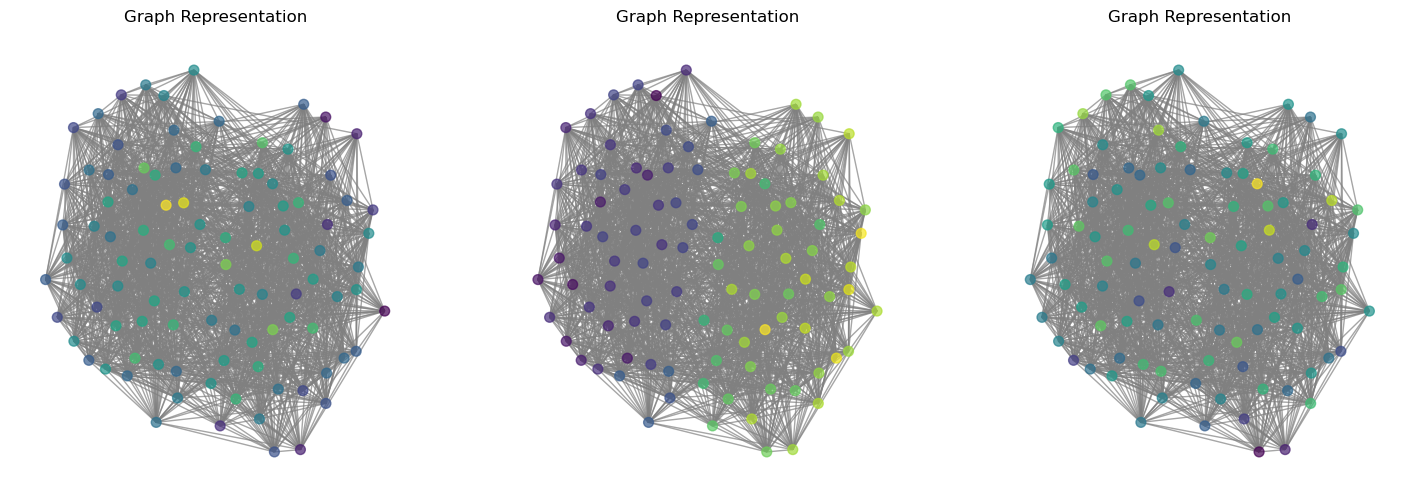

<Figure size 640x480 with 0 Axes>

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def spectral_analysis_and_visualization(norm_laplacian, true_labels, adjacency_matrix):
    eigenvalues, eigenvectors = np.linalg.eigh(norm_laplacian)

    smallest_eigenvalues = eigenvalues[:3]
    smallest_eigenvectors = eigenvectors[:, :3]

    print("First three eigenvalues:", smallest_eigenvalues)


    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    n = ["1st eigenvector", "2nd eigenvector", "3rd eigenvector"]
    for i in range(3):
        
        eigenvector_labels = (smallest_eigenvectors[:, i] - np.min(smallest_eigenvectors[:, i])) / (
            np.max(smallest_eigenvectors[:, i]) - np.min(smallest_eigenvectors[:, i])
        )
        eigenvector_labels = (eigenvector_labels * 255).astype(int)

        axs[i].set_title(n[i])
        plot_graph(adjacency_matrix, labels=eigenvector_labels, ax=axs[i])

    plt.show()

spectral_analysis_and_visualization(norm_laplacian, true_labels, adjacency_matrix)
plt.tight_layout()
plt.show()


## Task 3: Two-Group Community Detection

### Part 3.1: Fiedler Vector Analysis

**Objective**: Use the second eigenvalue (Fiedler vector) for binary community detection. using your observation from the last part.

> Hint: some simple thresholding will suffice

Detection accuracy = 0.0 %


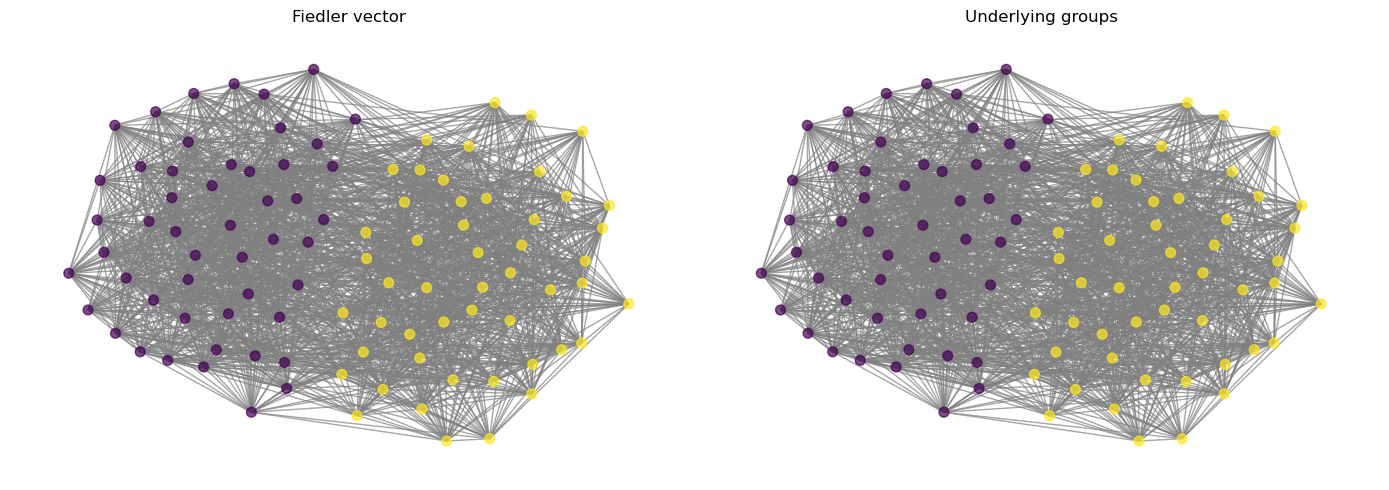

In [39]:
fiedler_vector = eigenvectors [:, 1]

threshold = np.median(fiedler_vector)

detected_labels = np.where(fiedler_vector > threshold, 2, 1)

accuracy = np.max(np.sum(true_labels == detected_labels)) / true_labels.shape[0] * 100

print(f"Detection accuracy = {accuracy} %")

figs, axs = plt.subplots(1, 2, figsize=(14, 5))
plot_graph(adjacency_matrix, labels=detected_labels, ax=axs[0])
axs[0].set_title("Fiedler vector")

plot_graph(adjacency_matrix, labels=true_labels, ax=axs[1])
axs[1].set_title("Underlying groups")

plt.tight_layout()
plt.show()



### Task 4: Multi-Group Spectral Embedding

**(a)** Create a sample graph $ G \sim \text{SBM}(1000, 0.5, 0.2) $. Plot this graph in two dimensions using spectral embedding. To achieve this, use the second and third smallest eigenvectors of the normalized Laplacian, such that the $ x $-coordinate of each vertex corresponds to the values in the second eigenvector $ \psi_2 $, and the $ y $-coordinate corresponds to the third eigenvector $ \psi_3 $. Assign each vertex a color according to its community to visually differentiate groups.

**(b)** Based on your observations of the graph, suggest a method to recover the community memberships using only the embedding visualization.

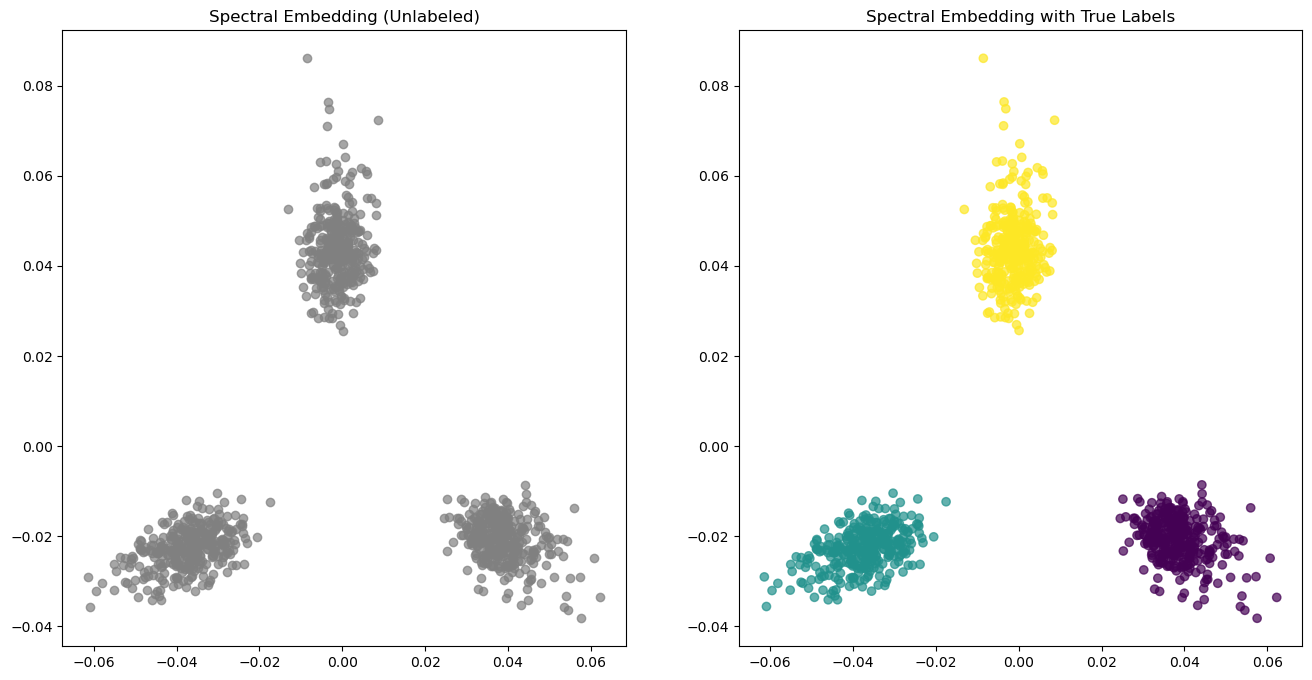

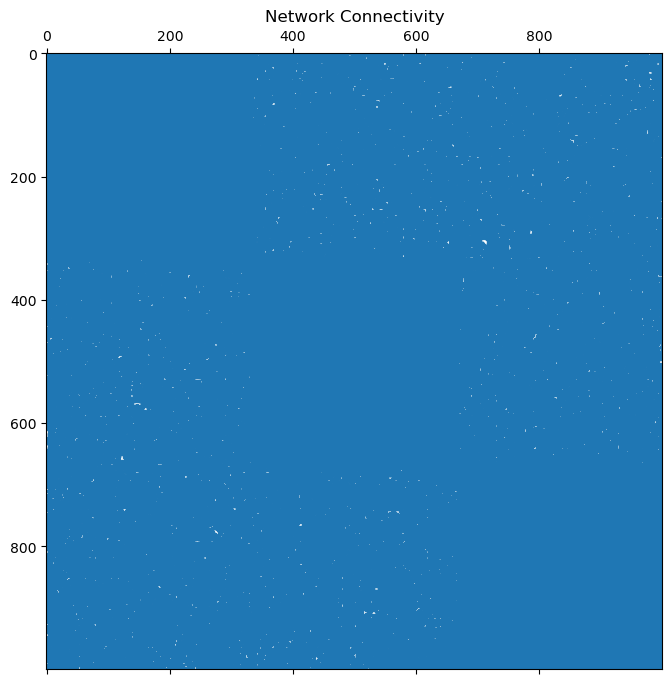

In [41]:
adjacency_matrix, true_labels = generate_SBM_network(
    group_sizes=[333, 334, 333], 
    p=0.5, 
    q=0.2
)

laplacian = np.diag(adjacency_matrix.sum(axis=1)) - adjacency_matrix
_, eigenvectors = np.linalg.eigh(laplacian)

x_coords = eigenvectors[:, 1]
y_coords = eigenvectors[:, 2]

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].scatter(x_coords, y_coords, c='gray', alpha=0.7)
axes[0].set_title("Spectral Embedding (Unlabeled)")

axes[1].scatter(x_coords, y_coords, c=true_labels, cmap='viridis', alpha=0.7)
axes[1].set_title("Spectral Embedding with True Labels")

plt.show()
plot_adjacency_matrix(adjacency_matrix)



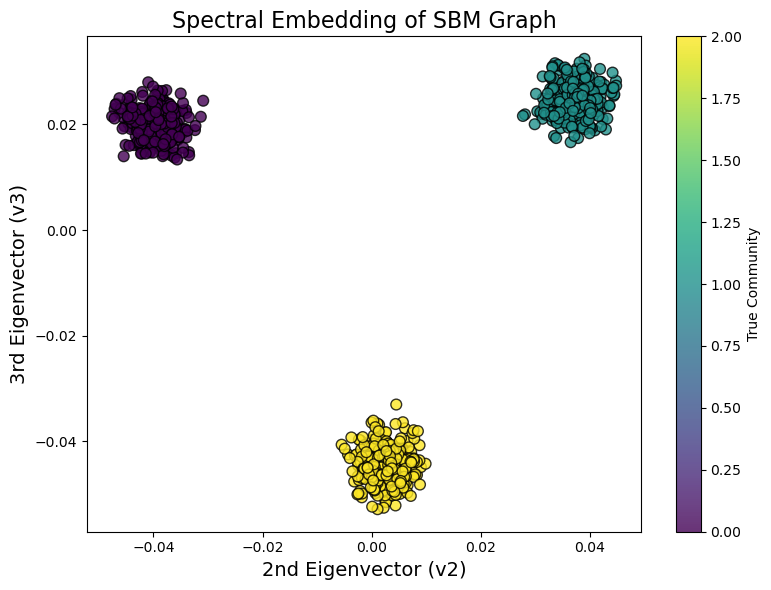

In [42]:
norm_laplacian = compute_laplacian(adjacency_matrix, normalized=True)
eigenvalues, eigenvectors = np.linalg.eigh(norm_laplacian)
sorted_indices = np.argsort(eigenvalues)
sorted_eigenvectors = eigenvectors[:, sorted_indices]
v2 = sorted_eigenvectors[:, 1]
v3 = sorted_eigenvectors[:, 2]
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(v2, v3, c=true_labels, cmap='viridis', s=60, edgecolor='k', alpha=0.8)
ax.set_title("Spectral Embedding of SBM Graph", fontsize=16)
ax.set_xlabel("2nd Eigenvector (v2)", fontsize=14)
ax.set_ylabel("3rd Eigenvector (v3)", fontsize=14)
plt.colorbar(scatter, label="True Community")
plt.tight_layout()
plt.show()


What is your suggestion?

> Your answer: The clusters can be reconstructed in the 2D space using a clustering algorithm, like k-means, based on the spectral embedding derived from the second and third eigenvectors.

### Task 5: Spectral Clustering of an SBM with 4 Classes

In this task, you will implement spectral clustering on an SBM graph with 4 communities.

1. **Generate the SBM Graph**:  
   Create a graph $ G \sim \text{SBM}(1000, \{250, 250, 250, 250\}, 0.5, 0.2) $ with 1000 nodes and 4 communities.

2. **Spectral Embedding**:  
   Compute the normalized Laplacian $ L_{\text{norm}} $ of the graph. Perform eigenvalue decomposition to obtain the eigenvectors.

3. **Clustering**:  
   Use the first few eigenvectors for spectral embedding, then apply your proposed method to cluster the nodes into 4 communities.

4. **Visualization**:  
   Visualize the clustering results and compare the community structure obtained from spectral clustering with the true SBM community structure.

you can utilize any library, including `sklearn` for anything except for calculating the spectrum.

C:\Users\Surface Taha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Surface Taha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


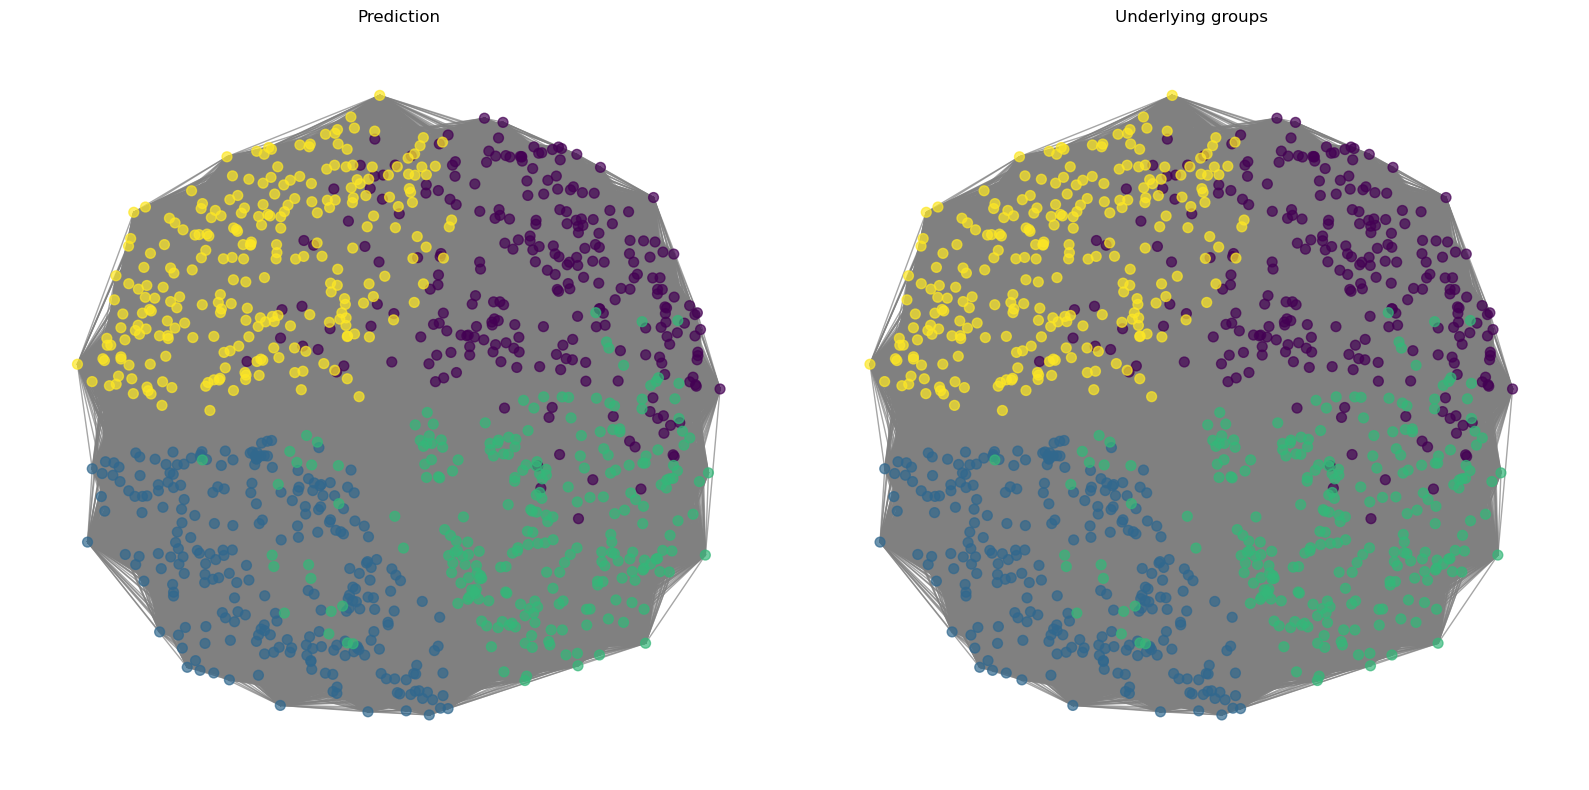

In [77]:
from sklearn.cluster import KMeans

group_sizes = [250, 250, 250, 250]  
p = 0.5  
q = 0.2  

adjacency_matrix, true_labels = generate_SBM_network(group_sizes, p, q)
norm_laplacian = compute_laplacian(adjacency_matrix, normalized=True)
eigenvalues, eigenvectors = np.linalg.eig(norm_laplacian)

sorted_indices = np.argsort(eigenvalues)
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

n_clusters = 4
embedding = sorted_eigenvectors[:, :n_clusters]

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
predicted_labels = kmeans.fit_predict(embedding)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

plot_graph(adjacency_matrix, labels=predicted_labels, ax=axes[0])
axes[0].set_title('Prediction')

plot_graph(adjacency_matrix, labels=true_labels, ax=axes[1])
axes[1].set_title('Underlying groups')

plt.tight_layout()
plt.show()


## Task 6: Kernel-Based Spectral Clustering

**Objective**: Implement spectral clustering for general vector datasets using kernel methods.

### Introduction:

In the previous tasks, we used spectral clustering to identify communities in a graph, relying on the adjacency matrix as the input. This method works well when the relation between the underlying datapoints is given by the graph's adjacency matrix which captures the underlying relationships.

However, in many real-world applications, data is not presented in this way, we might just have some feature vectors for each data point.
As you have previously seen, one simple method of spectral clustering is `Kmeans`, This method works well when the data is either linearly separable.

As we saw, the spectral clustering algorithm can cluster arbitrary graphs efficiently, how can we use it to cluster feature-vector like data?

The answer lies in **kernel methods**. Specifically, we can use a **Gaussian kernel** to generate an adjacency matrix and create an underlying relation graphs.

### Gaussian Kernel:

The Gaussian kernel is commonly used for this purpose because it measures similarity between points in a way that allows for more flexibility in handling non-linear relationships. The kernel is defined as:

$$
K_{ij} = \exp\left(-\frac{\|x_i - x_j\|^2}{2\sigma^2}\right)
$$

Where $ \|x_i - x_j\| $ is the Euclidean distance between data points $ x_i $ and $ x_j $, and $ \sigma $ is a parameter that controls the spread of the kernel function (often referred to as the "bandwidth"). A small $ \sigma $ means the kernel is sensitive to small distances, while a large $ \sigma $ allows the kernel to be more forgiving.

### Implementation:

To apply kernel-based spectral clustering, we follow these steps:

1. **Compute the Kernel Matrix**: Use the Gaussian kernel to compute a similarity matrix between all pairs of nodes in your graph or dataset. This matrix will act as the new adjacency matrix.
   
2. **Use what you have**: Treat this as the adjacency matrix of the graph, and use it for clustering!

In [79]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

def fit(X, n_clusters=3, sigma=1.0):
    kernel_matrix = rbf_kernel(X, gamma=1.0 / (2 * sigma ** 2))
    degree_matrix = np.diag(np.sum(kernel_matrix, axis=1))
    laplacian_matrix = degree_matrix - kernel_matrix
    eigvals, eigvecs = np.linalg.eigh(laplacian_matrix)
    eigvecs = eigvecs[:, :n_clusters]
    row_sums = np.linalg.norm(eigvecs, axis=1, keepdims=True)
    eigvecs = eigvecs / row_sums
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(eigvecs)
    labels = kmeans.labels_
    return labels


C:\Users\Surface Taha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Surface Taha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Surface Taha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Surface Taha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid

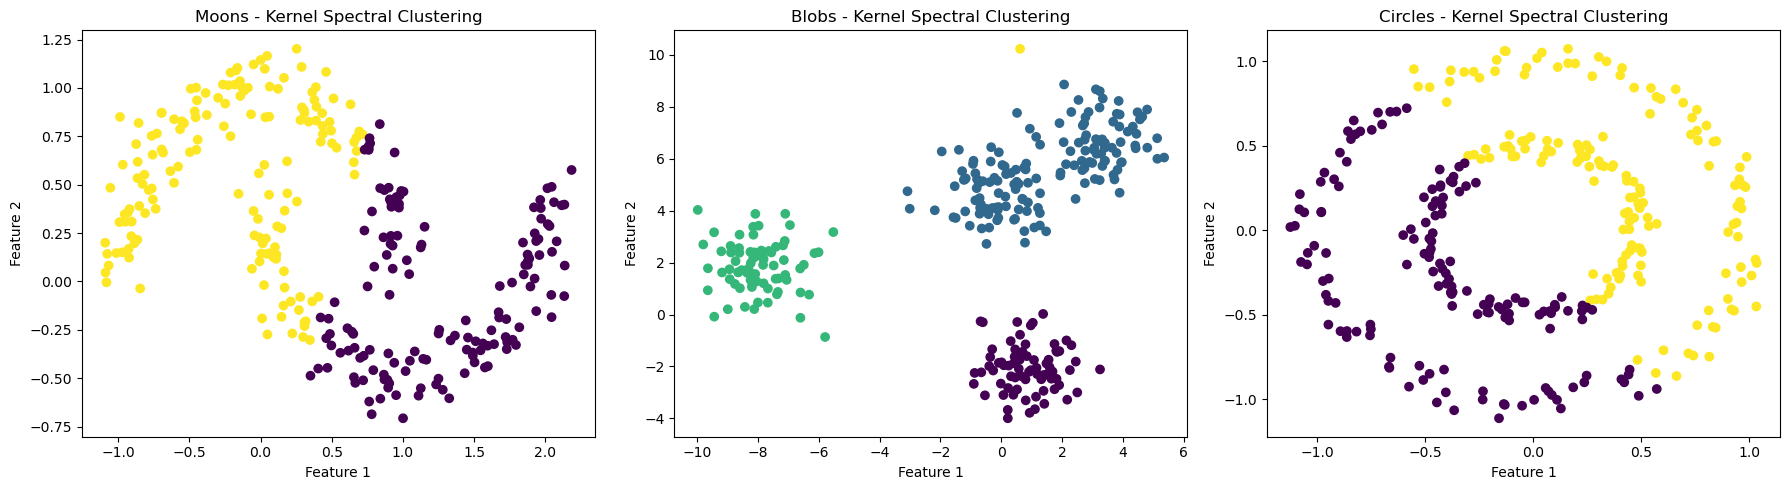

In [80]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs, make_circles
from sklearn.metrics import pairwise_distances_argmin_min

datasets = {
    'Moons': make_moons(n_samples=300, noise=0.1),
    'Blobs': make_blobs(n_samples=300, centers=4),
    'Circles': make_circles(n_samples=300, noise=0.05, factor=0.5)
}
n_clusters = [2, 4, 2]

def fit(X, n_clusters=3, sigma=1.0):
    from sklearn.metrics.pairwise import rbf_kernel
    from sklearn.cluster import KMeans
    import numpy as np

    kernel_matrix = rbf_kernel(X, gamma=1.0 / (2 * sigma ** 2))
    degree_matrix = np.diag(np.sum(kernel_matrix, axis=1))
    laplacian_matrix = degree_matrix - kernel_matrix
    eigvals, eigvecs = np.linalg.eigh(laplacian_matrix)
    eigvecs = eigvecs[:, :n_clusters]
    row_sums = np.linalg.norm(eigvecs, axis=1, keepdims=True)
    eigvecs = eigvecs / row_sums
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(eigvecs)
    labels = kmeans.labels_
    return labels

# Plotting results for each dataset
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (dataset_name, (X, _)) in enumerate(datasets.items()):
    labels = fit(X, n_clusters=n_clusters[i])
    axes[i].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    axes[i].set_title(f'{dataset_name} - Kernel Spectral Clustering')
    axes[i].set_xlabel('Feature 1')
    axes[i].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()


### Task 6.1: Comparison

Compare your clustering results, with some other clustering methods you learnt in class.

C:\Users\Surface Taha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Surface Taha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Surface Taha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Surface Taha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid

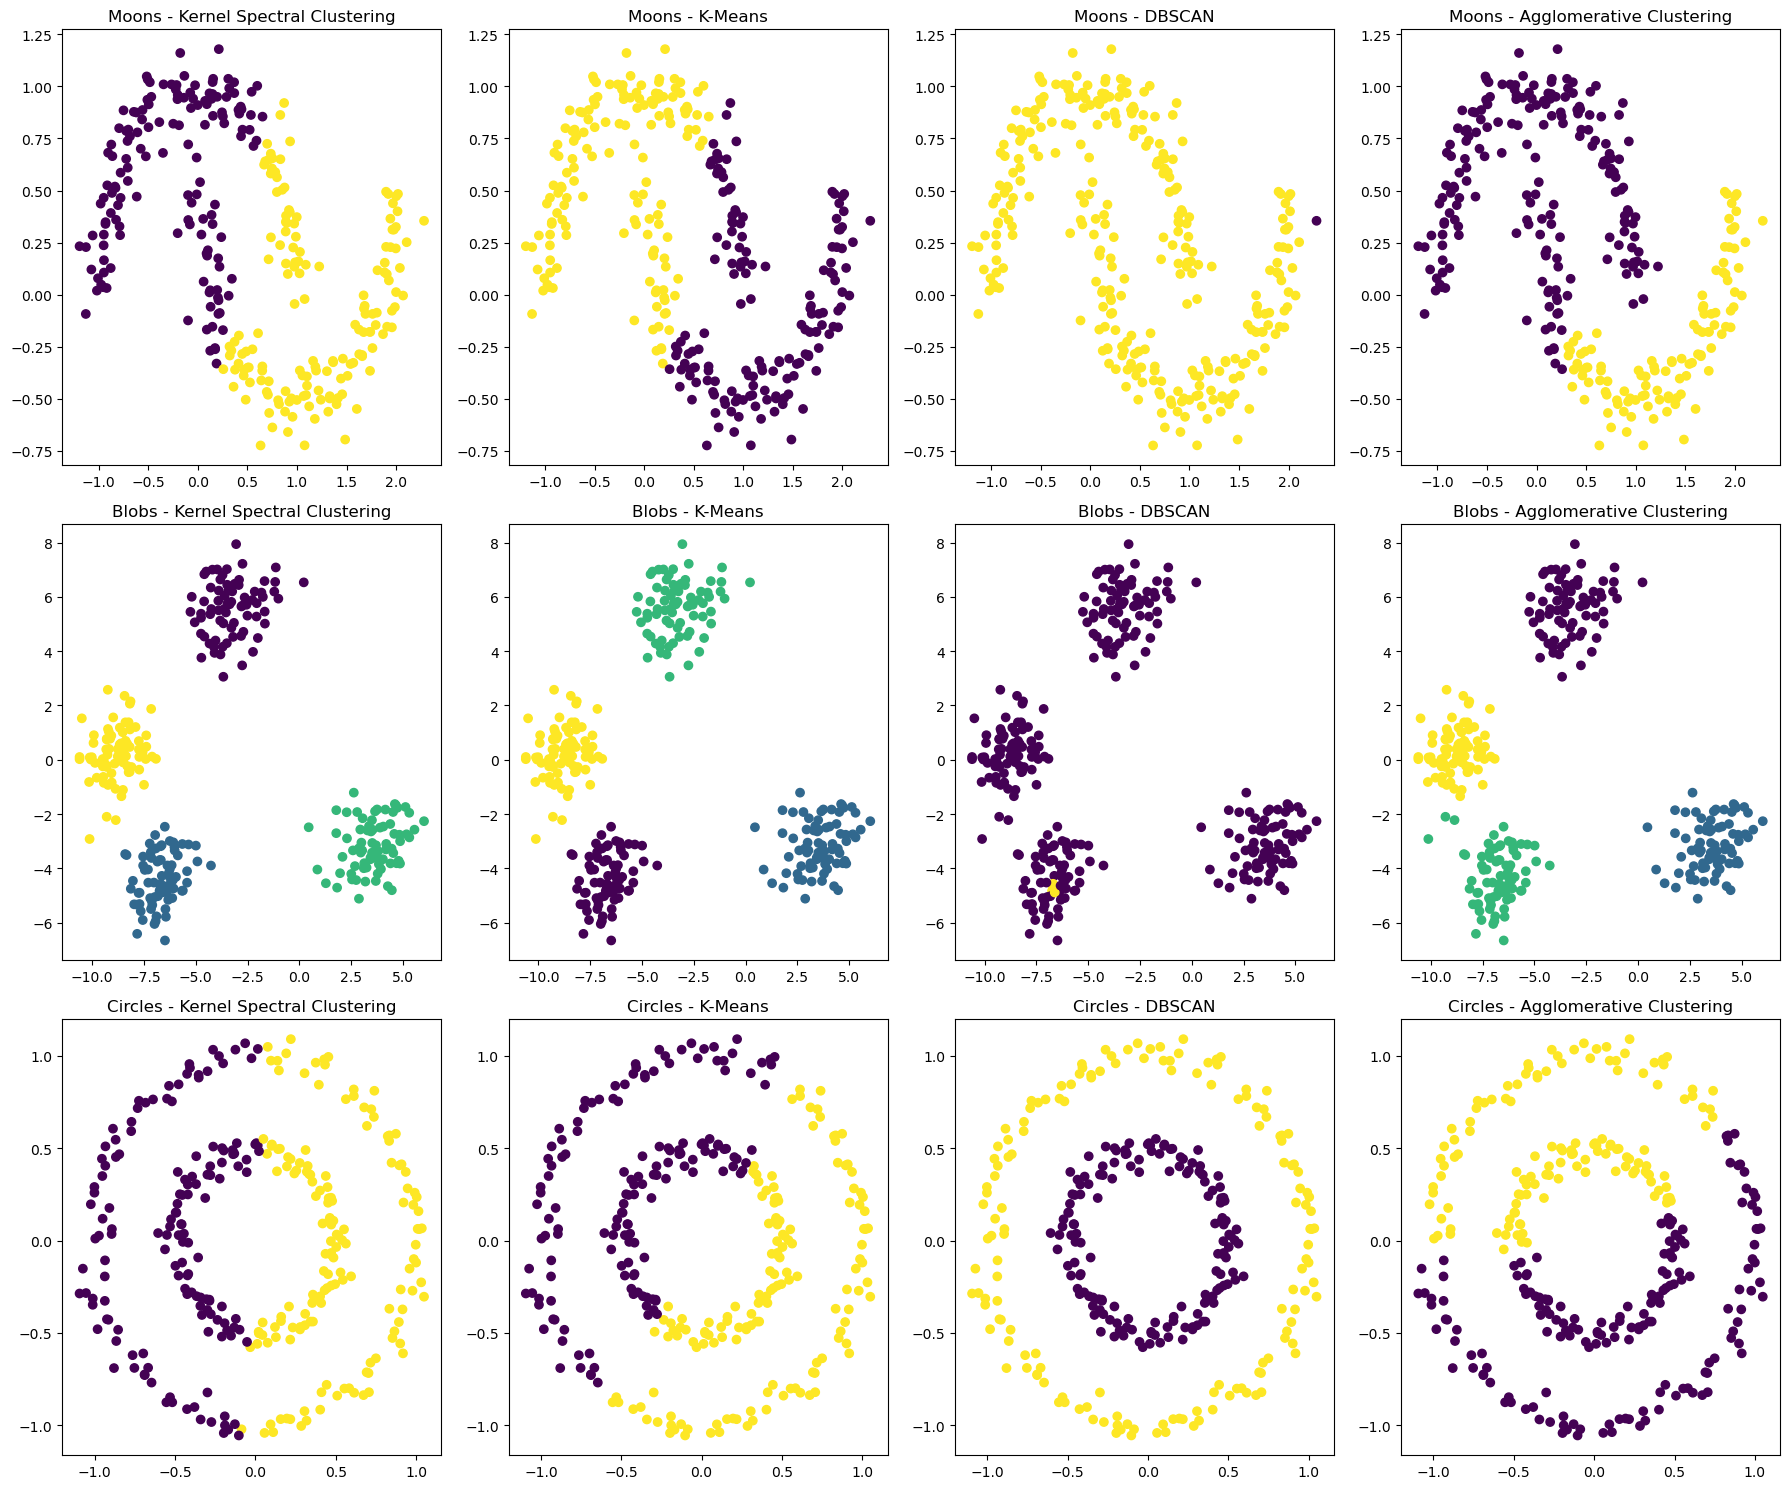

In [81]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs, make_circles
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics.pairwise import rbf_kernel
import numpy as np

datasets = {
    'Moons': make_moons(n_samples=300, noise=0.1),
    'Blobs': make_blobs(n_samples=300, centers=4),
    'Circles': make_circles(n_samples=300, noise=0.05, factor=0.5)
}

n_clusters = [2, 4, 2]

def fit(X, n_clusters=3, sigma=1.0):
    kernel_matrix = rbf_kernel(X, gamma=1.0 / (2 * sigma ** 2))
    degree_matrix = np.diag(np.sum(kernel_matrix, axis=1))
    laplacian_matrix = degree_matrix - kernel_matrix
    eigvals, eigvecs = np.linalg.eigh(laplacian_matrix)
    eigvecs = eigvecs[:, :n_clusters]
    row_sums = np.linalg.norm(eigvecs, axis=1, keepdims=True)
    eigvecs = eigvecs / row_sums
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(eigvecs)
    labels = kmeans.labels_
    return labels

fig, axes = plt.subplots(3, 4, figsize=(18, 15))
axes = axes.ravel()

for i, (dataset_name, (X, _)) in enumerate(datasets.items()):
    labels_spectral = fit(X, n_clusters=n_clusters[i])
    axes[i * 4].scatter(X[:, 0], X[:, 1], c=labels_spectral, cmap='viridis')
    axes[i * 4].set_title(f'{dataset_name} - Kernel Spectral Clustering')

    kmeans = KMeans(n_clusters=n_clusters[i])
    labels_kmeans = kmeans.fit_predict(X)
    axes[i * 4 + 1].scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='viridis')
    axes[i * 4 + 1].set_title(f'{dataset_name} - K-Means')

    dbscan = DBSCAN(eps=0.2, min_samples=5)
    labels_dbscan = dbscan.fit_predict(X)
    axes[i * 4 + 2].scatter(X[:, 0], X[:, 1], c=labels_dbscan, cmap='viridis')
    axes[i * 4 + 2].set_title(f'{dataset_name} - DBSCAN')

    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters[i])
    labels_agg = agg_clustering.fit_predict(X)
    axes[i * 4 + 3].scatter(X[:, 0], X[:, 1], c=labels_agg, cmap='viridis')
    axes[i * 4 + 3].set_title(f'{dataset_name} - Agglomerative Clustering')

plt.tight_layout()
plt.show()


In conclusion, by applying kernel-based spectral clustering, we can effectively cluster complex datasets with non-linear and non-convex decision boundaries, revealing meaningful structures in the data that may not be captured using traditional clustering methods.

The caveat is, this algorithm is sensitive to the kernel, and the gaussian kernel is highly sensitive to the hyperparameter $\sigma$.